# Classification  
We use features, and a classifier, to predict categorical variables.  

### Steps in doing Classification 
1. Import Packages 
2. Load dataset  and set X and y 
3. Train-test Split  
4. Descriptive and Prescriptive Analytics on Train Set  
5. Predictive Analytics from Train Set to Test Set  
6. Metrics (accuracy, confusion matrix)  
7. Explain Results  

# 1. Import Packages

In [1]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

sns.set(rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split # split dataset

from sklearn.linear_model import LogisticRegression # linear model for classification

from sklearn.metrics import confusion_matrix

# 2. Load Data

In [2]:
data = pd.read_csv('census.csv')

In [3]:
data.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Dataset Description 

We want to predict if whether income exceeds $50K/yr based on census data.:  

- feature 1
- feature 2
- feature 3
etc

In [4]:
data.dtypes
# change all objects to categories -- accd to Charina
# problem is there are column names with dash so it's recognized as operator
# - we need to change this via

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [5]:
data = data.rename(columns={'education-num' : 'education_num', 'marital-status' : 'marital_status', 'hours-per-week' : 'hours_per_week', 'native-country' : 'native_country', 'capital-gain': 'capital_gain', 'capital-loss': 'capital_loss'})

In [6]:
data.dtypes

age                  int64
workclass           object
education_level     object
education_num      float64
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
capital_gain       float64
capital_loss       float64
hours_per_week     float64
native_country      object
income              object
dtype: object

In [7]:
data[['workclass','education_level','marital_status','occupation','relationship','race','sex','native_country','income']] = data[['workclass','education_level','marital_status','occupation','relationship','race','sex','native_country','income']].astype('category')

In [8]:
data.dtypes
# now it will return all objects as categories
# search why you need to change object to category

age                   int64
workclass          category
education_level    category
education_num       float64
marital_status     category
occupation         category
relationship       category
race               category
sex                category
capital_gain        float64
capital_loss        float64
hours_per_week      float64
native_country     category
income             category
dtype: object

In [9]:
data1 = pd.get_dummies(data[['workclass', 'education_level', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']])
#don't include income, it's ok not to dummy it as it's the target or y

In [10]:
new_income = pd.get_dummies(data['income'])
print(new_income)
# drop column to retain just 1 column

income  <=50K  >50K
0           1     0
1           1     0
2           1     0
3           1     0
4           1     0
...       ...   ...
45217       1     0
45218       1     0
45219       1     0
45220       1     0
45221       0     1

[45222 rows x 2 columns]


In [11]:
# df = pd.DataFrame(new_income)

#FROM XAVIER
pd.get_dummies(new_income).iloc[:,1]1


SyntaxError: invalid syntax (<ipython-input-11-a1e50cf00416>, line 4)

In [12]:
data = pd.concat([data,data1],axis=1,sort=False)

In [13]:
data = pd.concat([data,new_income],axis=1,sort=False)

In [14]:
data.head()
#to check if all the added columns were successful

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,<=50K,>50K
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,...,0,0,0,0,0,1,0,0,1,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,...,0,0,0,0,0,1,0,0,1,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,...,0,0,0,0,0,1,0,0,1,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,...,0,0,0,0,0,1,0,0,1,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
numeric_data = (data[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']])

In [16]:
numeric_data.head()

,age,education_num,capital_gain,capital_loss,hours_per_week
0,39,13.0,2174.0,0.0,40.0
1,50,13.0,0.0,0.0,13.0
2,38,9.0,0.0,0.0,40.0
3,53,7.0,0.0,0.0,40.0
4,28,13.0,0.0,0.0,40.0


In [17]:
data.dtypes

age                                 int64
workclass                        category
education_level                  category
education_num                     float64
marital_status                   category
                                   ...   
native_country_ United-States       uint8
native_country_ Vietnam             uint8
native_country_ Yugoslavia          uint8
<=50K                               uint8
>50K                                uint8
Length: 114, dtype: object

In [18]:
# write list of features we want to use
# features = [[data1, numeric_data]] 

# # Set X
# X = data[features]

In [19]:
data1.shape, numeric_data.shape

((45222, 98), (45222, 5))

In [20]:
# X = data[features]
X = pd.concat([data1, numeric_data], axis=1)
X.shape

(45222, 103)

In [21]:
X.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,...,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,age,education_num,capital_gain,capital_loss,hours_per_week
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,39,13.0,2174.0,0.0,40.0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,50,13.0,0.0,0.0,13.0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,38,9.0,0.0,0.0,40.0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,53,7.0,0.0,0.0,40.0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,28,13.0,0.0,0.0,40.0


In [22]:
# # write list of features we want to use
# features = ["Daily Time Spent on Site", 'Area Income', "Age"]

# # Set X
# X_temp = data[features]


# # Convert text to numeric
# X = pd.get_dummies(X_temp)

# Set y
y = data[">50K"]
#make it the heading, not "income"

In [23]:
## FEATURE SELECTION 1: SELECTKBEST

# from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
# X, y = load_digits(return_X_y=True)
X.shape

X_new = SelectKBest(chi2, k=20).fit_transform(X,y)
X_new.shape

(45222, 20)

In [24]:
### how to return all 20 features selected by SelectKBest

fs = SelectKBest(score_func=chi2, k=20)
fs.fit_transform(X,y)
# print (list(zip(fs.get_support(),X.columns)))

features_decisions = pd.DataFrame({'Chosen': fs.get_support(),
              'Feature': X.columns})
# make 2 data frames where 1st column is all the Chosen features and 2nd column is all the features

features_decisions[features_decisions['Chosen'] == True]
# this filters all the chosen that has true

,Chosen,Feature
3,True,workclass_ Self-emp-inc
16,True,education_level_ Bachelors
19,True,education_level_ Masters
21,True,education_level_ Prof-school
23,True,marital_status_ Divorced
25,True,marital_status_ Married-civ-spouse
27,True,marital_status_ Never-married
33,True,occupation_ Exec-managerial
37,True,occupation_ Other-service
39,True,occupation_ Prof-specialty


In [25]:
# # ## FEATURE SELECTION 2: RFE

# # from sklearn.datasets import make_friedman1
# from sklearn.feature_selection import RFE
# from sklearn.svm import SVR
# # X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
# estimator = SVR (kernel="linear") 
#DON'T USE SVR LINEAR. YOU CAN USE DECISION TREE


# selector = RFE(estimator, 5, step=100)
# selector = selector.fit(X, pd.get_dummies(y).iloc[:,1])

#DO NOT REPEAT


In [26]:
# pd.get_dummies(y).iloc[:,1].head()
# did this above already

In [27]:
X_new

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 2.174e+03, 0.000e+00,
        4.000e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.300e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        4.000e+01],
       ...,
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        5.000e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 5.455e+03, 0.000e+00,
        4.000e+01],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        6.000e+01]])

In [28]:
!pip install XGBoost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# 3. Train-Test Split  
We use the training set for descriptive and diagnostic analytics and use the model we develop here to do predictive analytics on the test set.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# 4. Predictive Analytics
Train a model that predicts if the person clicked on the ad or not.

In [30]:
# initialize model
# log_reg = LogisticRegression()
# change this all the time, whatever you need

model = XGBClassifier()


# fit model
# log_reg.fit(X_train, y_train)

model.fit(X_train, y_train)

print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [31]:
# metrics (accuracy)
# acc = log_reg.score(X_test, y_test)

In [32]:
# feature importance
# log_reg.coef_
# model.coef_

print(model.feature_importances_)

[1.48541741e-02 3.23580508e-03 3.82633833e-03 6.28904672e-03
 1.66702233e-02 0.00000000e+00 0.00000000e+00 2.47395458e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.27008639e-03
 4.99627599e-03 9.30517854e-04 2.43366398e-02 7.37938285e-03
 0.00000000e+00 0.00000000e+00 5.02965937e-04 1.06849917e-03
 1.08020594e-02 3.50147605e-01 2.28920067e-03 1.65289938e-02
 8.29253579e-04 8.51073023e-03 3.97299277e-03 0.00000000e+00
 2.56413803e-03 3.81042361e-02 1.12655060e-02 1.53454933e-02
 1.41646508e-02 2.94479914e-02 0.00000000e+00 2.65984349e-02
 9.42415034e-04 4.76369681e-03 5.80043998e-03 3.04335309e-03
 1.09237467e-03 8.39177985e-03 0.00000000e+00 2.26017237e-02
 2.22257082e-03 1.37294903e-02 5.96856233e-03 4.54817992e-03
 4.06237878e-03 0.00000000e+00 6.94313413e-03 1.25204977e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [33]:
# predictions
y_pred = model.predict(X_test)

In [34]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: >50K, dtype: uint8

In [35]:
predictions = [round(value) for value in y_pred]

In [36]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.8623472828790978


# 5. Metrics

Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples:

$\begin{equation}
accuracy = \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions\ made}
\end{equation}$



In [ ]:
# # accuracy
# acc

#don't call this anymore

In [37]:
predictions = [round(value) for value in y_pred]
precision = precision_score(y_test, predictions)
print(precision)

0.7927229346853564


In [38]:
recall = recall_score(y_test, predictions)
print(recall)

0.5969009656411408


In [39]:
#precision
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     13636
           1       0.79      0.60      0.68      4453

    accuracy                           0.86     18089
   macro avg       0.84      0.77      0.80     18089
weighted avg       0.86      0.86      0.86     18089



### What is a Confusion Matrix?  
A confusion matrix is a summary of prediction results on a classification problem.  

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.  

The confusion matrix shows the ways in which your classification model is confused when it makes predictions.  

It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.  

It is this breakdown that overcomes the limitation of using classification accuracy alone.  

In [40]:
# confusion matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[12941,   695],
       [ 1795,  2658]], dtype=int64)

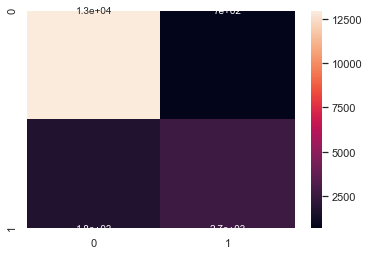

In [41]:
# heatmap of confusion matrix 
sns.heatmap(cf, annot = True)

# 7. Explain Results

85% accuracy means the model is able to predict INCOME but it can be improved.  
For the confusion matrix, we want the diagonal values to be higher than off diagonal values.   
For the heatmap of confusion matrix, we want the diagonal to be darker than off diagonal.

[Guide to confusion matrices](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

# 8. Explain Predictions (didn't do this part anymore)

We can try out our model with new data to see if we can predict that the user will click on the ad or not.

In [42]:
# Assign test data into new variable
test_data = X_test

# Create column to insert predictions
test_data['predictions'] = y_pred

C:\Users\JVilladiego.000\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# Describe why the 
test_data[test_data['predictions']==0].describe()

In [ ]:
test_data[test_data['predictions']==1].describe()

# 9. Predict on New Data (didn't do this part anymore)

In [ ]:
# Input new data on daily time spent on site, area income and age
new_data = [[300, 10000, 24]]

log_reg.predict(new_data) # 1 means the user will click, 0 means the user won't

In [ ]:
another_data = [[10, 1000, 24]]

log_reg.predict(another_data) # 1 means the user will click, 0 means the user won't